In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import numpy as np
import math
import re

df = pd.read_csv("Montreal.csv", index_col=0, header=0)
cant_datos = df['name'].count()

# Eliminar las columnas que no se van a utilizar
df = df.drop(columns=['neighbourhood_group'])

print('\nCantidad de datos:',len(df),'\n')

print('Top 5 hosts más solicitados:')
print(df['host_name'].value_counts()[0:5],'\n')

print('Top 5 locales más solicitados')
print(df['name'].value_counts()[0:5],'\n')

print('Top 5 barrios más solicitados')
print(df['neighbourhood'].value_counts()[0:5],'\n')

print('Solicitudes por barrio')
print(df['neighbourhood'].value_counts(),'\n')

print('Tipos de habitación solicitadas')
print(df['room_type'].value_counts(),'\n')

print('Las habitaciones mas baratas')
df1 = df.nsmallest(5, columns=['price'])
hc_nom = df1['name'].tolist()
hc_pre = df1['price'].tolist()

for i in range(len(hc_nom)):
    print('$', hc_pre[i], hc_nom[i])

print('\nLas habitaciones mas caras')
df1 = df.nlargest(5, columns=['price'])
hc_nom = df1['name'].tolist()
hc_pre = df1['price'].tolist()
for i in range(len(hc_nom)):
    print('$', hc_pre[i], hc_nom[i])

print("\n --- Datos de la ciudad de Montréal ---")

#print('\nSuma de reviews')
#print(df["number_of_reviews"].sum())

print('\nPromedio de reviews por mes')
print(df["reviews_per_month"].mean(), 'reviews')

print('\nPromedio de arriendos de locales por host')
print(df["calculated_host_listings_count"].mean(), 'arriendos por cada host')

print('\nPromedio de días disponibles de arriendos anual')
print(df["availability_365"].mean(), 'días')

print('\nGanancias totales')
print('$', df["price"].sum(), 'dólares')


# El host mas solicitado
# El local mas pedido
# Barrio en donde mas solicitan
# Que tipos de habitación son los que mas solicitan
# Las 3 más baratas
# Las 3 más caras
# Las mas antiguas (reviews)
# Las mas nuevas (reviews)
# Las mas demandadas (reviews)
# Cantidad de review por año (no tiene sentido)
# Cantidad de dias disponibles en el año (los 3 mejores y peores)
# Reviews por año
# Cuales son las habitaciones que se reservan por un tiempo mas largo
# Promedio de reviews por mes

"""
calculated_host_listings_count: Es un recuento de listados que tiene un host específico
Básicamente, nos dice la cantidad de veces que ese host 
en particular ha usado airbnb en ese conjunto de datos. 
Entonces, si calcula_host_listings_count es 6, entonces
puede ver que host_name tiene exactamente 6 filas en ese
conjunto de datos.
"""


Cantidad de datos: 13410 

Top 5 hosts más solicitados:
Yan                101
Samuel              84
Alex                81
Simplissimmo        78
Corporate Stays     75
Name: host_name, dtype: int64 

Top 5 locales más solicitados
Downtown Montreal Fully furnished apartment WIFI     65
🌈 Endroit Propre & Aseptisé! La Sécurité d'abord!    13
15, 30 or 60 days rental available. Ask for info!    13
Loft Hotel Montreal - Urban                          11
Loft Hotel Montreal - Loft                           10
Name: name, dtype: int64 

Top 5 barrios más solicitados
Ville-Marie                            3633
Le Plateau-Mont-Royal                  3483
Rosemont-La Petite-Patrie              1264
Côte-des-Neiges-Notre-Dame-de-Grâce    1012
Le Sud-Ouest                            914
Name: neighbourhood, dtype: int64 

Solicitudes por barrio
Ville-Marie                                 3633
Le Plateau-Mont-Royal                       3483
Rosemont-La Petite-Patrie                   1264
Côt

'\ncalculated_host_listings_count: Es un recuento de listados que tiene un host específico\nBásicamente, nos dice la cantidad de veces que ese host \nen particular ha usado airbnb en ese conjunto de datos. \nEntonces, si calcula_host_listings_count es 6, entonces\npuede ver que host_name tiene exactamente 6 filas en ese\nconjunto de datos.\n'

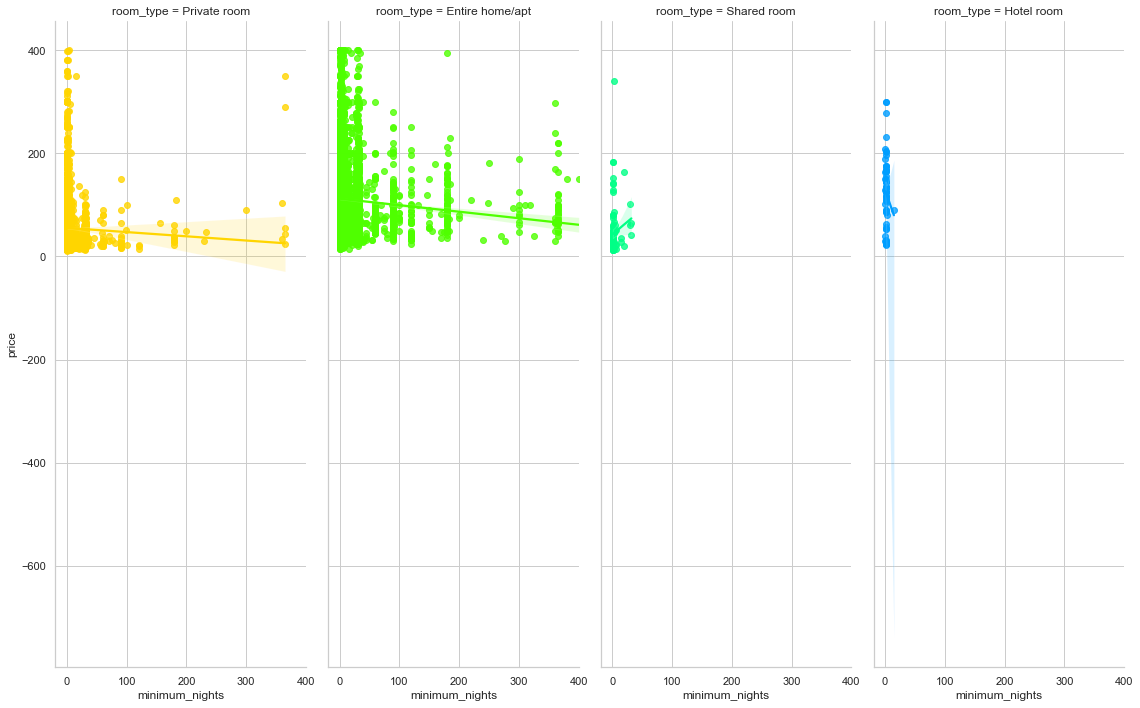

In [43]:
import seaborn as sns
df_aux=df[["minimum_nights", "price", "room_type", "number_of_reviews"]]
df_aux=df_aux[df.price<=400]
df_aux=df_aux[df.minimum_nights<=400]
sns.set(style="whitegrid", palette="hsv")
sns.lmplot(x="minimum_nights", y="price",hue="room_type", col="room_type", data=df_aux, height=10, aspect=.4, x_jitter=.1)

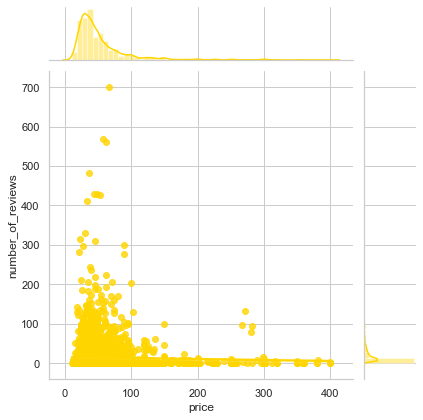

In [52]:

sns.jointplot(x="price", y="number_of_reviews",data=df_aux[df_aux.room_type=="Private room"],kind="reg")

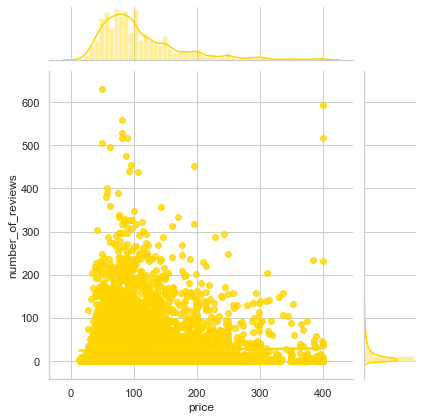

In [53]:
sns.jointplot(x="price", y="number_of_reviews",data=df_aux[df_aux.room_type=="Entire home/apt"],kind="reg")

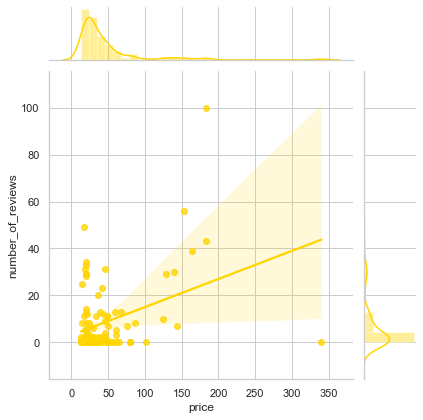

In [54]:
sns.jointplot(x="price", y="number_of_reviews",data=df_aux[df_aux.room_type=="Shared room"],kind="reg")